(unit6.1)=
# Unit 6.1: Frequency Response of a Transfer Function

Follow along at [cpjobling.github.io/eg-150-textbook/freq_resp/tf_response](https://cpjobling.github.io/eg-150-textbook/freq_resp/tf_response)

![QR Code for this lecture](pictures/qr_code_for_unit61.png)

## Acknowledgements

This Unit is preparation for EG-247 Digital Signal Processing and EG-243 Modern Control Systems. It will not be examined for EG-150. 

The notes for this section have been adapted from the MATLAB LiveScript **FrequencyResponseAnalysis.mlx** from the MathWorks curriculum module [Transfer Function Analysis of Dynamic Systems](https://uk.mathworks.com/matlabcentral/fileexchange/94635-transfer-function-analysis-of-dynamic-systems) {cite}`tfads`.  To get the most out of this Unit, you should install that project and run the activities and complete the exercises.

We will go through the process for installing the MatWorks curriculum process during the lecture.

The other examples in the project provide useful reinforcement of the concepts covered in Units 4-6 of this course. They will form the basis of the introduction to EG-247 next year.

# Agenda

* {ref}`unit6.1.1`
* {ref}`unit6.1.2`
* {ref}`unit6.1.3`
* {ref}`unit6.1.4`
* {ref}`unit6.1.5`

(unit6.1.1)=
## Frequency response of a transfer function

A transfer function with complex poles has undamped natural frequencies given by the magnitudes of the poles: $\omega_n = |p|$. If an input force drives a system at or near its natural frequency, the solution can grow rapidly in magnitude.

### Exercise
In this example, we will visually analyze  mass-spring-damper's response to sinusoidal inputs $u=\sin\left(\omega_u t\right)$ with various frequencies $\omega_u$.

::: {figure-md} fig:unit6.1:1
<img src="pictures/smd.png" alt="daigram of a mass-spring-damper system" width="50%" />

Mass-spring-damper diagram
:::

To get the full interactive experience, go the exercise in the MATLAB LiveScript **FrequencyResponseAnalysis.mlx**.

The transfer function of the mass-spring-damper is

$$\frac{X(s)}{U(s)} = \frac{1}{ms^2 + cs + k}.$$

Assume $m = 1$ kg, $c = 0.1$ Ns/mk $k = 1$ N/m, then

$$\frac{X(s)}{U(s)} = \frac{1}{s^2 + 0.1s + 1}.$$

(a) What are the poles of the transfer function?

In [1]:
% Write your code here

Gs = tf(1,[1 0,1 1])

% Record your answer in p
p = pole(Gs)


Gs =
 
       1
  -----------
  s^3 + s + 1
 
Continuous-time transfer function.

p =

   0.3412 + 1.1615i
   0.3412 - 1.1615i
  -0.6823 + 0.0000i



(b) What is the undamped natural frequency of the function in rad/s?

In [2]:
% Write your code here

% Record your answer in freq
[freq,zeta] = damp(Gs)


freq =

    0.6823
    1.2106
    1.2106


zeta =

    1.0000
   -0.2818
   -0.2818



(c) The simulation below drives the function $G$ with an input function $U = \sin( \omega_u t )$ which has a frequency of $\omega_u$ rad/s. The input and output signals are plotted by simulating the response with the [`lsim`](https://uk.mathworks.com/help/control/ref/dynamicsystem.lsim.html) function.

* What driving frequency $\omega_u$ produces the response with the greatest magnitude?

* How long does it take for the response to reach a steady state?

* Does the frequency of the steady-state waveform match the frequency of the input waveform?

* Is the output $x(t)$ in or out of phase with the input $u(t)$? Does this depend on $\omega_u$?

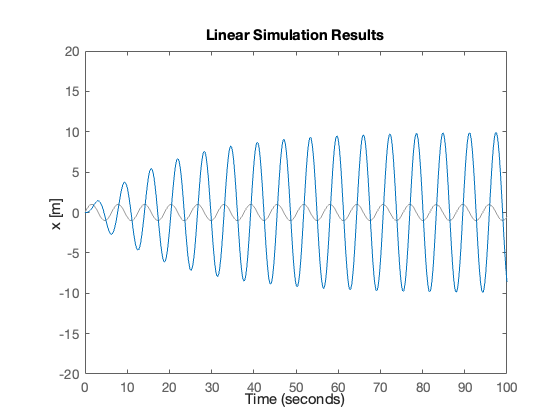

In [3]:
% min=0.1 max = 2; step=0.1; default = 0.5;
omegau = 1; % Frequency of the forcing [rad/s]
figure
t = linspace(0,100,1e3);   % Time variable array
u = sin(omegau*t);         % Forcing function (as an array)
G = tf([0 0 1],[1 0.1 1]); % The transfer function
lsim(G,u,t)                % Run simulation
axis([0 100 -20 20])       % Adjust the axis limits
ylabel("x [m]")

(unit6.1.2)=
## Constructing a Bode plot

In general, the frequency response of a transfer function is analyzed by providing input sinusoids with different frequencies and identifying how the magnitude and phase of the steady output changes.

::: {figure-md} fig:unit6.1:2
<img src="pictures/fr.png" alt="The steady response of a linear time-invariant system to a sine input will be a sine wave with the same frequency as the input. The response sine wave undergoes a phase shift and a change in magnitude that depend on the frequency of the input sine wave. This plot only shows the response to a single frequency." width="75%" />

The steady response of a linear time-invariant system to a sine input will be a sine wave with the same frequency as the input. The response sine wave undergoes a phase shift and a change in magnitude that depend on the frequency of the input sine wave. This plot only shows the response to a single frequency. 
:::

The frequency-domain analysis is often shown in a **Bode plot**. The Bode plot is constructed by plotting the phase shift and magnitude at varied input frequencies, capturing the system's response to many different frequencies in a single diagram.

(u6.1:activity)=
### Activity

In this activity (performed in the MATLAB Live Script **FrequencyDomainAnalysis.mlx**, you will construct the Bode plot for the mass-spring-damper displacement transfer function:

$$G(s) = \frac{1}{s^2 + 0.1s + 1}$$
      
For each sinusoidal input $u = \sin\left(\omega_u t\right)$ the output $x(t)$ shows a transient behavior and a steady state behavior. The steady-state behavior is a sine wave with magnitude $M$ and phase $\phi$: 

$$x_\mathrm{steady}(t) = M \sin \left(\omega_u t + \phi \right)$$
    
The Bode plot is generated by plotting the magnitude and phase of the steady-state output against the input frequency, $\omega_u(t)$. The magnitude and frequency are plotted on logarithmic axes.

Picture taken from MATLAB of the completed activity:

![Completed activity](pictures/activity1_complete.png)

#### Reflect

* At which frequency is the most significant change in magnitude observed?
* At which frequencies are the oscillations attenuated?
* How does the phase of the response change between low and high frequency input signals?

### Exercise

Consider the transfer function used in the previous activity:

$$G(s) = \frac{1}{ s^2 + 0.1 s + 1}$$
        
Generate the Bode diagram using the [`bode`](https://uk.mathworks.com/help/control/ref/dynamicsystem.bode.html) function. Use `grid on` to turn on the grid.


Gs =
 
         1
  ---------------
  s^2 + 0.1 s + 1
 
Continuous-time transfer function.


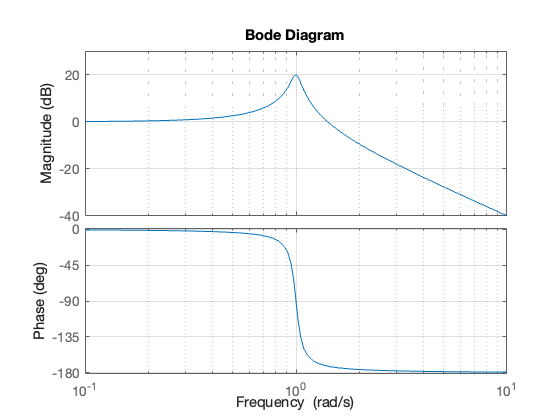

In [6]:
figure
Gs = tf(1,[1, 0.1, 1])
bode(Gs),grid

#### Reflect

* How does this Bode diagram differ from the one created in the previous activity?
* How do you think the phase and magnitude of the response are computed "under the hood?"

(unit6.1.3)=
## Numerical evaluation of the frequency response

It is not necessary to compute the time-domain response to create a Bode plot as done in the activity above. The activity only illustrates the principle behind the Bode plot. In practice, the frequency response can be computed entirely in the $s$-domain. This is accomplished by:

* generating the complex transfer function by making the substitution $s=j\omega$

* evaluating the complex transfer function at various frequencies

* computing the magnitude and phase of the result

### Example. 

Generate a Bode plot for the mass-spring-damper system:

$$G(s) = \frac{1}{s^2 + 0.1 s + 1}$$
        
by evaluating the complex transfer function.

#### Solution. 

The complex transfer function is created by setting $s = j\omega$:

$$G(j \omega) = \frac{1}{  (j\omega)^2 + 0.1(j  \omega) + 1} = \frac{1}{ - \omega^2 + 0.1 j  \omega + 1}$$

Numerically evaluating the complex transfer function for many frequencies $\omega$ can be accomplished using an array of frequencies.

In [8]:
omega = linspace(0.1,10,500);                   % An array of frequencies
Gjomega = 1./(-omega.^2 + 0.1*j*omega + 1);     % Complex transfer function evaluated at many frequencies

The magnitude and phase of complex transfer function values can be computed directly on the arrays.

In [9]:
M = abs(Gjomega);       % The magnitude of the complex number
Mdb = 20*log10(M);       % Magnitude in dB

In [10]:
phi = angle(Gjomega);   % Phase angle in radians
phiDeg = phi*180/pi;     % Phase angle in degrees

The first panel in the Bode plot is constructed by graphing the magnitude in dB against the input frequencies, $\omega$.

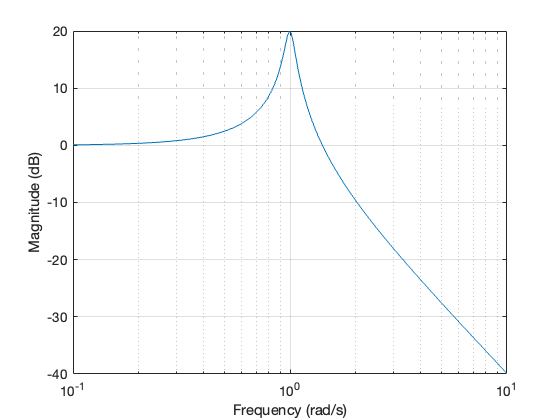

In [11]:
figure
semilogx(omega,Mdb),grid on
xlabel("Frequency (rad/s)")
ylabel("Magnitude (dB)")

The second panel is constructed by graphing the phase in degrees against the input frequencies, $\omega$.

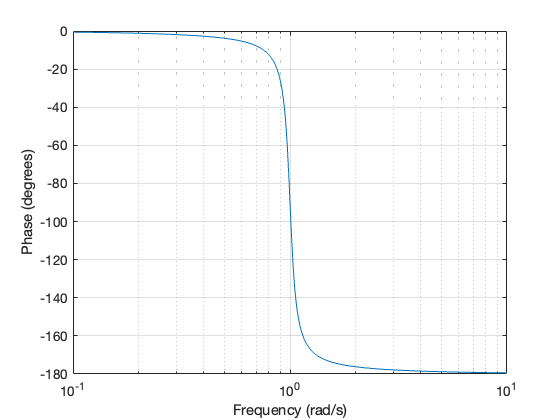

In [12]:
figure
semilogx(omega,phiDeg), grid on
xlabel("Frequency (rad/s)")
ylabel("Phase (degrees)")

(unit6.1.4)=
### Concluding Exercise

In this exercise, you will analyze the transfer function

$$H(s) = \frac{1}{s^2 + 9}$$
        
This transfer function corresponds to a mass-spring system with parameters $m=1$, $c=0$ and $k=9$.

**(a)** What are the natural frequencies of $H(s)$ in rad/s?

In [15]:
% Write your code here
Hs = tf(1,[1, 0, 9])
% Record your answer in omegan
[omegan,zetan] = damp(Hs)


Hs =
 
     1
  -------
  s^2 + 9
 
Continuous-time transfer function.

omegan =

     3
     3


zetan =

     0
     0



**(b)** Generate the Bode plot for $H(s)$ using the `bode` function.

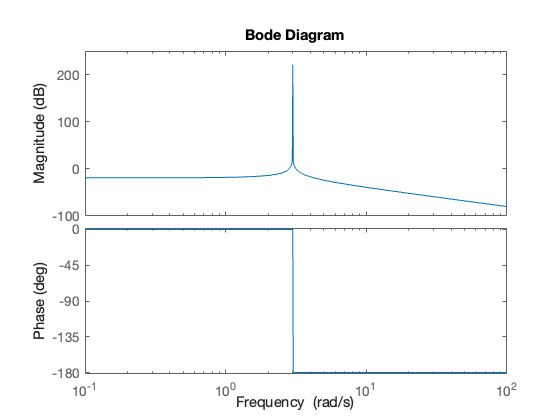

In [16]:
bode(Hs)

**(c)** Write the expression for the complex transfer function by making the substitution $s=j\omega$. What is the value of the complex transfer function for $\omega = 0.5$?

In [17]:
% Record your answer in Hcomplex
Hcomplex = 1./(-omegan(1)^2 + 9)


Hcomplex =

   Inf



**(d)** What are the magnitude (in dB) and phase (in degrees) of the transfer function for $\omega = 0.5$? Can you identify this point on the Bode plot?
* Use the definition $y_{[\mathrm{dB}]} = 20 \log_{10}(y)$.

In [22]:
w = 0.5;
MdB = 20*log10(abs(1./(-w^2 + 9)))% Calculate the magnitude in dB here
phase = angle(1./(-w^2 + 9))*180/pi % Calculate the phase in degrees herephase = angle(); % Calculate the phase in degrees here


MdB =

  -18.8402


phase =

     0



**(e)** Use the [`lsim`](https://uk.mathworks.com/help/control/ref/dynamicsystem.lsim.html?searchHighlight=lsim) function to compute and plot the time-domain response of $H$ to a sinusoidal input function

$$u(t) = \sin(\omega_n t)$$
     
where $\omega_n$ is the natural frequency you computed in **(a)**. Simulate until a final time of 100 seconds.

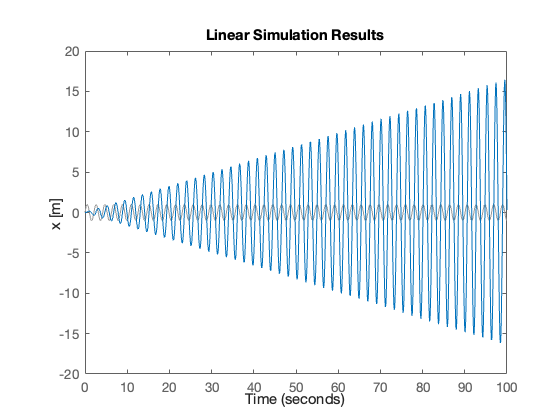

In [23]:
% Write your code here
t = linspace(0,100,1000);
u = sin(3*t);
lsim(Hs,u,t);
ylabel('x [m]')

(unit6.1.5)=
## Unit 6.1: Homework

1. Install the MathWorks curriculum module [Transfer Function Analysis of Dynamic Systems](https://uk.mathworks.com/matlabcentral/fileexchange/94635-transfer-function-analysis-of-dynamic-systems) {cite}`tfads` and open the MATLAB Live Script **FrequencyDomainAnalysis.mlx**. Explore the Exercises and Activities we have reviewed in the unit.

2. The remainder of the MATLAB Live Script **FrequencyDomainAnalysis.mlx** applies what we have looked at so far to a simple filtering problem based around a Buck Converter such as might be used in the DC-DC systems in an electric vehicle. Study the examples and try to complete the activities and exercises.

3. The remaining Live Scripts in the curriculum module demonstrate the cocepts of the Laplace transform, transfer functions and pole-zero analysis. You may find these useful. We will start EG-247 next year with these examples.

## Summary

In this unit we have ....

We covered the following topics

* {ref}`unit6.1.1`
* {ref}`unit6.1.2`
* {ref}`unit6.1.3`
* {ref}`unit6.1.4`
* {ref}`unit6.1.5`

(unit6.1:takeaways)=
### Unit 6.1: Take Aways

#### Frequency response

If you subject a stable LTI system with transfer function

$$H(s) = \frac{Y(s)}{X(s)}$$

to a sinusoidal input signal $x(t) = A_\mathrm{in} \sin\left(\omega t \right)$, the steady-state response (after any initial transients have decayed to zero) will also be a sinusoidal signal $y(t) = A_\mathrm{out}\sin\left(\omega t + \phi\right)$. That is a signal with the same frequency as the input signal but a new amplitude $A_\mathrm{out}$ and a possible phase-shift $\phi$.

The output signal amplitude and phase-shift can be measured experimentally, e.g. with a signal generator and oscilloscope. We then plot the *magnitude*

$$M = \left|\frac{A_\mathrm{out}}{A_\mathrm{in}} \right|$$

and phase-shift $\phi$ (in degrees) on two plots against frequency. These plot represents the *frequency response* of the system.

#### Frequency response from system function

The frequency response of a stable LTI system depends only on $H(s)$. To determine the magnitude and phase we let $s = j\omega$ then

$$M = \left|H(j\omega\right)|,\,\phi = \angle H(j\omega)$$

Since $H(j\omega)$ will be a *complex number* with real part $\Re\left\{H(j\omega)\right\}$ and imaginary part $\Im\left\{H(j\omega)\right\}$, the magnitude is 

$$M = \sqrt{\Re\left\{H(j\omega)\right\}^2 + \Im\left\{H(j\omega)\right\}^2}$$

and the phase-shift is

$$\phi = \tan^{-1} \frac{\Im\left\{H(j\omega)\right\}}{\Re\left\{H(j\omega)\right\}}. $$

#### MATLAB functions introduced

* `tf`: define a system as a transfer function.
* `lsim`: simulate the response of a system defined by `tf`.
* `abs`: compute the magnitude of (a vector) of complex numbers.
* `angle`: compute the angle of (a vector) of complex numers.

If `z` is a complex number (or a vector of complex numbers), we compute magnitude in dB using `20*log10(abs(z))` and phase-shift in degrees using `(180/pi)*angle(z)`.

## Coming next

The Bode plot is a form of frequency response diagram for which the magnitude (in DB) and phase (in degrees) are plotted against the log of frequency. Such a plot has nice geometric properties that we can exploit to simplify the analysis of complex systems. We will explore Bode diagrams in some detail in {ref}`unit6.2`.

## References

```{bibliography}
:filter: docname in docnames
```